# Tutorial 06 - B Dimensions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### 1. Load in Iris dataset

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Checking the data wwe have 150 rows and 5 columns 

### 2. Create a summary dataframe

In [3]:
summary_data = pd.DataFrame()

The has created an empty dataframe where we can then add columns for each variety

In [4]:
summary_data['Setosa'] = data[data['variety'] == 'Setosa'].mean()
summary_data['Versicolor'] = data[data['variety'] == 'Versicolor'].mean()
summary_data['Virginica'] = data[data['variety'] == 'Virginica'].mean()

This block of code adds the mean values for each variety of iris in the dataset to its own column

In [5]:
print(summary_data)

              Setosa  Versicolor  Virginica
sepal.length   5.006       5.936      6.588
sepal.width    3.428       2.770      2.974
petal.length   1.462       4.260      5.552
petal.width    0.246       1.326      2.026


By printing this dataframe we can check that we have the correct data to work with as we have the mean values for each attribute of the three variety 

In [6]:
summary_data = summary_data.transpose()

In [7]:
print(summary_data)

            sepal.length  sepal.width  petal.length  petal.width
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026


Trasnsposing this dataset lets rows become columns and columns become rows, this is seen in the cell above and checking againts the previous print statement before the transpose function was applied

### 3. Visualisation with 3 radar subplots

In [8]:
normalised_data = summary_data
print(normalised_data)

            sepal.length  sepal.width  petal.length  petal.width
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026


Normalising this dataframe values ready to be used for a radar plot

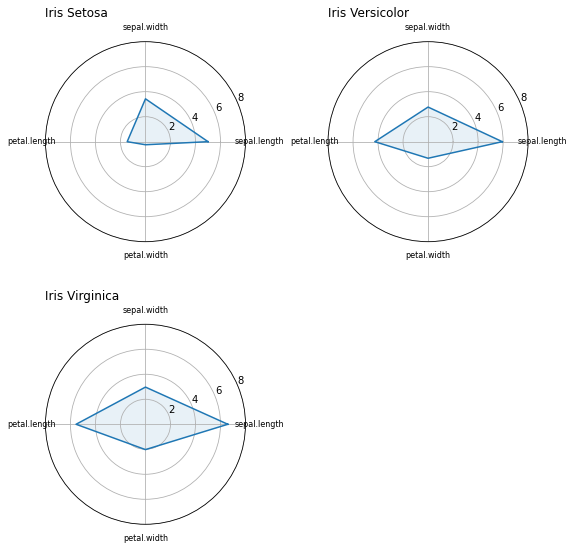

In [9]:
selected = ['Setosa', 'Versicolor', 'Virginica']

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=8)
    sub.set_yticks([2.0, 4.0, 6.0, 8.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Iris ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

From these radar subplots we can see that Versicolor and Virginica are very similar in sepal length and width and have a very similar shape overal in this plot

### 4. Comparative bar chart to compare these metrics

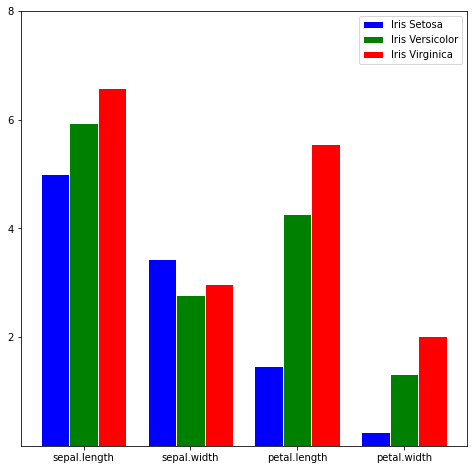

In [10]:
selected = ['Setosa', 'Versicolor', 'Virginica']
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(8, 8))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
            width=bar_width, edgecolor='white', label='Iris ' + name)
    c += 1
plt.yticks([2.0, 4.0, 6.0, 8.0])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend()
plt.show()

With the comparitive bar chart we can see that the Versicolor and the Virginica follow the same patterns with their attributes much closer then the Setosa data. 

As for which is easier to interpret, the radar subplots give a visualisation that is shape based which allows for faster consupmtion of the data then the bar chart. With this said comparitive bar charts do have the pattern side by side so with a little more study into this graph there shows a clear pattern. However if we were to implement a overlaid comparitive radar plot this would then produce a plot that would take the best of both graphs 